# **----------- Summative Assignment - Crop Yield Prediction In East Africa ---------------**
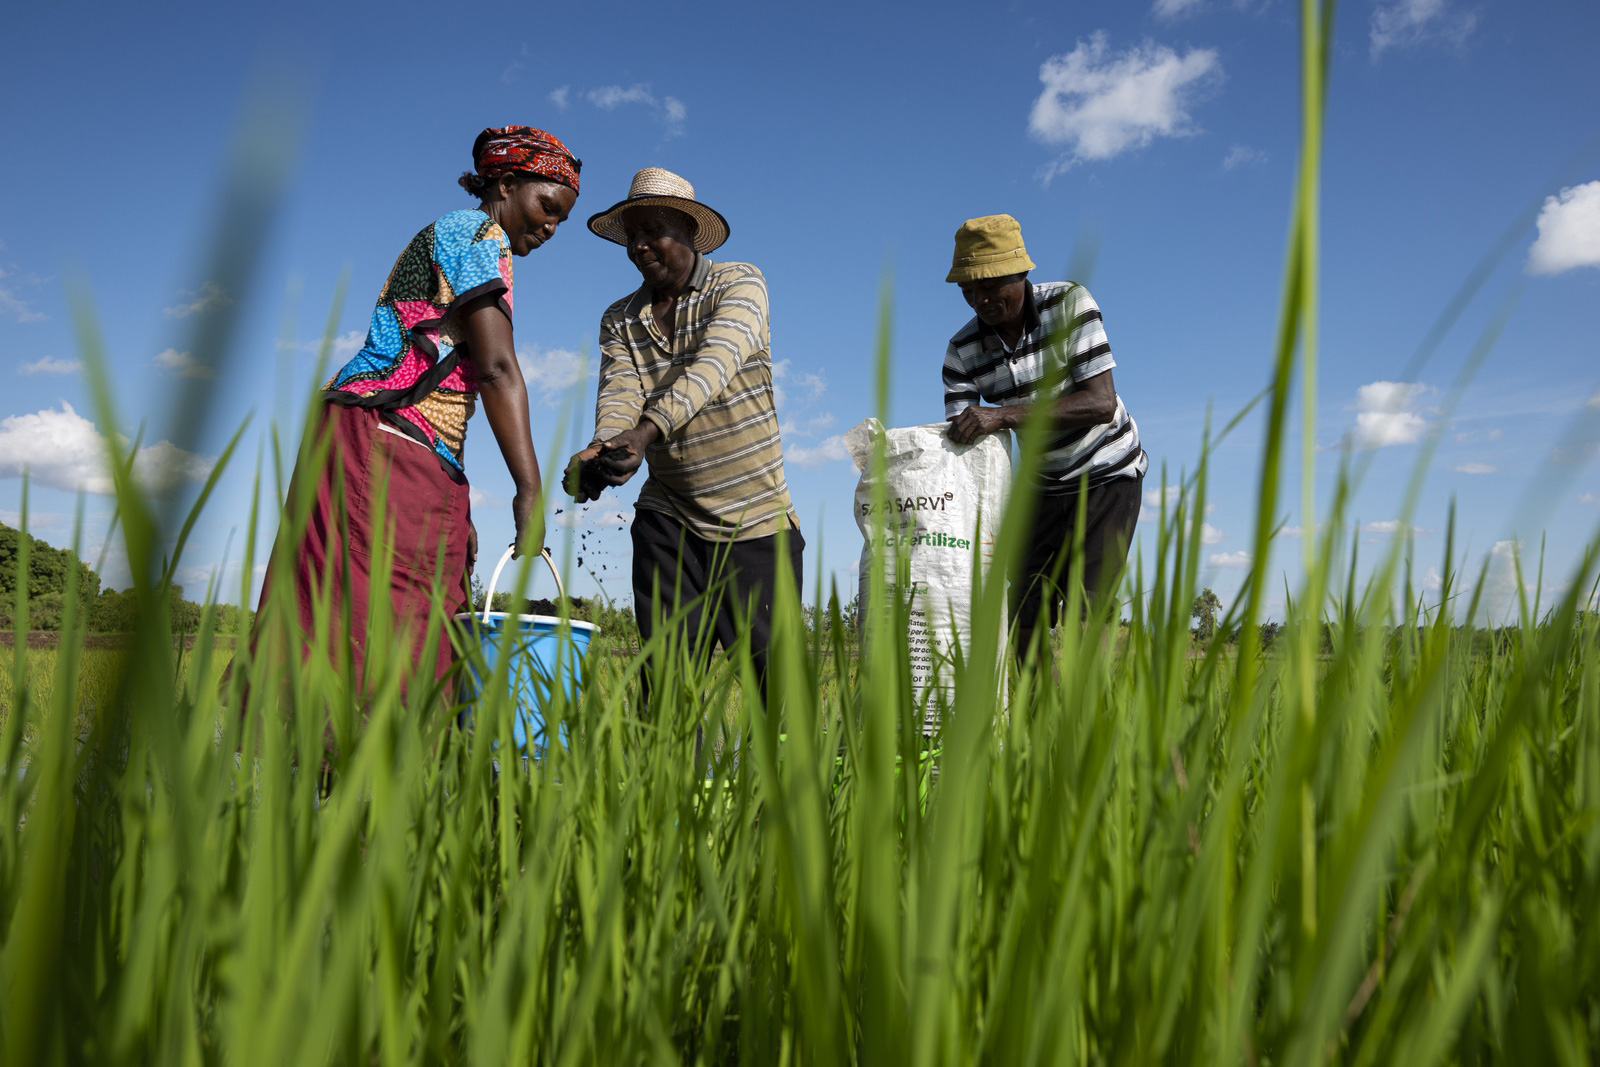
--> The use of machine learning technology in predicting crop yield has gained attention in recent years due to its potential to improve accuracy and efficiency. This project aims to develop a machine learning model that can accurately predict crop yield in Africa, thereby improving agricultural planning and resource allocation and ensuring food security.


**--> So for this Project we will developing a Machine Learning Model to predict Crop Yields In East Africa.**



***---------Let's Go!--------------------***

In [465]:
# General imports 
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### NB: >> We were not able to find a dataset that consisted of all the data we wanted in one single dataset so we download various datasets and then we will merge them as one and use the data set to train our model. We will show each and every step as we move on forward during the data preparation and exploration step. 

In [466]:
# First let us mount our datasets

from google.colab import drive
drive.mount('/content/drive')

pesticides = pd.read_csv('/content/drive/MyDrive/Crop Yield Prediction Datasets/pesticides.csv')
rainfall = pd.read_csv('/content/drive/MyDrive/Crop Yield Prediction Datasets/rainfall.csv')
temperature = pd.read_csv('/content/drive/MyDrive/Crop Yield Prediction Datasets/temp.csv')
yields = pd.read_csv('/content/drive/MyDrive/Crop Yield Prediction Datasets/yield.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step-One: Data Preparation**

--> On this step, we will see the general format of the datasets we have collected and we will prepared our dataset we are going to use by merging different datasets we have collected.

## **Pesticides Dataset**

In [467]:
pesticides # Here we will just view the contents of the data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...,...,...
4784,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2014,tonnes,2185
4785,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2015,tonnes,2185
4786,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2016,tonnes,2185
4787,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2017,tonnes,2185


In [468]:
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB


In [469]:
pesticides.describe()

,Year,Value
count,4789.000000,4.789000e+03
mean,2004.142619,2.894718e+04
std,8.302595,1.627207e+05
min,1990.000000,0.000000e+00
25%,1997.000000,9.900000e+01
50%,2004.000000,1.221000e+03
75%,2011.000000,7.420000e+03
max,2018.000000,1.815690e+06


In [470]:
# Here we will do some data cleaning and Remove unnecessary columns
pesticides_df = pesticides.drop(['Domain', 'Element'], axis=1)

# This is the new dataset we are going to use after droping the unneccessery ones
pesticides_df 

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,tonnes,121
1,Albania,Pesticides (total),1991,tonnes,121
2,Albania,Pesticides (total),1992,tonnes,121
3,Albania,Pesticides (total),1993,tonnes,121
4,Albania,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...
4784,Zimbabwe,Pesticides (total),2014,tonnes,2185
4785,Zimbabwe,Pesticides (total),2015,tonnes,2185
4786,Zimbabwe,Pesticides (total),2016,tonnes,2185
4787,Zimbabwe,Pesticides (total),2017,tonnes,2185


## **Rainfall Dataset**

In [471]:
rainfall

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,2.03926,2016,Aug Average,Zimbabwe,ZWE
272828,0.48070,2016,Sep Average,Zimbabwe,ZWE
272829,9.13410,2016,Oct Average,Zimbabwe,ZWE
272830,72.95080,2016,Nov Average,Zimbabwe,ZWE


In [472]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1    Year            272832 non-null  int64  
 2    Statistics      272832 non-null  object 
 3    Country         272832 non-null  object 
 4    ISO3            272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [473]:
rainfall.describe()

,Rainfall - (MM),Year
count,272832.000000,272832.000000
mean,103.470868,1958.500000
std,113.231867,33.485133
min,0.000000,1901.000000
25%,24.168375,1929.750000
50%,66.431550,1958.500000
75%,149.647250,1987.250000
max,2699.190000,2016.000000


In [474]:
# Here we collect and refine the Rain data in years for each country
rainfall_df = rainfall.groupby([' Year', ' Country', ' ISO3'], as_index=False, axis=0).sum()

# This is the new dataset we will be using after we make the adjustments
rainfall_df

<ipython-input-474-7decb4c9de02>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df = rainfall.groupby([' Year', ' Country', ' ISO3'], as_index=False, axis=0).sum()


,Year,Country,ISO3,Rainfall - (MM)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


## **Temperature Dataset**

In [475]:
temperature

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,18.75550,2016,Aug Average,Zimbabwe,ZWE
272828,22.99190,2016,Sep Average,Zimbabwe,ZWE
272829,25.86640,2016,Oct Average,Zimbabwe,ZWE
272830,25.85150,2016,Nov Average,Zimbabwe,ZWE


In [476]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1    Year                    272832 non-null  int64  
 2    Statistics              272832 non-null  object 
 3    Country                 272832 non-null  object 
 4    ISO3                    272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [477]:
temperature.describe()

,Temperature - (Celsius),Year
count,272832.000000,272832.000000
mean,18.631498,1958.500000
std,10.248635,33.485133
min,-34.121000,1901.000000
25%,13.231575,1929.750000
50%,22.736300,1958.500000
75%,25.797700,1987.250000
max,38.566900,2016.000000


In [478]:
# Here we will group Average temperature data in years for each country
temperature_df =temperature.groupby([' Year', ' Country', ' ISO3'], as_index=False, axis=0).mean()

# Here is the new dataset we will be using after adjustments
temperature_df

<ipython-input-478-6e5a10f9f0b3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df =temperature.groupby([' Year', ' Country', ' ISO3'], as_index=False, axis=0).mean()


,Year,Country,ISO3,Temperature - (Celsius)
0,1901,Afghanistan,AFG,13.172872
1,1901,Albania,ALB,11.030938
2,1901,Algeria,DZA,22.290008
3,1901,Andorra,AND,9.960649
4,1901,Angola,AGO,21.365725
...,...,...,...,...
22731,2016,Venezuela,VEN,26.478200
22732,2016,Vietnam,VNM,25.073158
22733,2016,Yemen,YEM,24.221200
22734,2016,Zambia,ZMB,22.737050


## **Yield Dataset**

In [479]:
yields

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [480]:
yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [481]:
yields.describe()

,Year,Value
count,63691.000000,6.369100e+04
mean,1992.332669,8.581113e+04
std,16.888797,1.008880e+05
min,1961.000000,0.000000e+00
25%,1978.000000,1.770700e+04
50%,1994.000000,4.705900e+04
75%,2007.000000,1.185070e+05
max,2019.000000,2.236842e+06


In [482]:
# Here we will do some data cleaning and Remove unnecessary columns
yield_df = yields.drop(['Domain', 'Element'], axis=1)

# This is the new dataset we are going to use after droping the unneccessery ones
yield_df


,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857
...,...,...,...,...,...
63686,Zimbabwe,Wheat,2015,hg/ha,20486
63687,Zimbabwe,Wheat,2016,hg/ha,19013
63688,Zimbabwe,Wheat,2017,hg/ha,17542
63689,Zimbabwe,Wheat,2018,hg/ha,16379


## **1.1 Merging the Datasets**

>> Here we will merge the datasets into one complete dataset so that we can use this new data set that consists of all the data we need in one place.

In [483]:
# Here we will start by renaming some of the columns from each datasets

# For rainfall
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall',' Country':'Country', ' Year':'Year'}, axis=1, inplace=True) 
#For Temperature
temperature_df.rename({'Temperature - (Celsius)': 'Temperature',' Country':'Country', ' Year':'Year'}, axis=1, inplace=True) 

#For Yeilds
yield_df.rename({'Area': 'Country', 'Value': 'Yield(hg/ha)','Year':'Year',' Country':'Country', ' Year':'Year'}, axis=1, inplace=True) 

# For pesticides
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides(tonnes)','Year': 'Year',' Country':'Country', ' Year':'Year'}, axis=1, inplace=True) 


In [484]:
# Here we are just clearing any leading spaces from the two datasets
rainfall_df['Country']=rainfall_df['Country'].str.strip()
temperature_df['Country']=rainfall_df['Country'].str.strip()

In [485]:
# Here Unit is unneccessary so we will drop it 
yield_df.drop(['Unit'], axis=1, inplace=True)

rainfall_df.drop([' ISO3'], axis=1, inplace=True)
temperature_df.drop([' ISO3'], axis=1, inplace=True)

# Here Unit and Item is unneccessary so we will drop it 
pesticides_df.drop(['Unit', 'Item'], axis=1, inplace=True)


###  ->> The next will be the merging process.

In [486]:
# Now Here is where we start our merging proccess

#First we merge rainfall and temperature since they have the same column names in their dataset
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Year','Country'])
     

In [487]:
# Here we will merge yeild with the rain_temp_df
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Year','Country'])

In [488]:
#Here we will merge pestiside with the other new created dataframe
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])


In [489]:
# Below is our new dataframe
new_data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall', 'Temperature', 'Pesticides(tonnes)', 'Yield(hg/ha)']]
#So here the rainfall is represented in mm and the temperature is represented in Celisius
new_data

,Year,Country,Item,Rainfall,Temperature,Pesticides(tonnes),Yield(hg/ha)
0,1990,Albania,Barley,812.23450,12.051221,121,10000
1,1990,Albania,Carrots and turnips,812.23450,12.051221,121,150000
2,1990,Albania,Cauliflowers and broccoli,812.23450,12.051221,121,171429
3,1990,Albania,Garlic,812.23450,12.051221,121,65000
4,1990,Albania,Maize,812.23450,12.051221,121,36613
...,...,...,...,...,...,...,...
25224,2016,Zimbabwe,Maize,455.13295,22.310167,2185,4405
25225,2016,Zimbabwe,Oats,455.13295,22.310167,2185,20505
25226,2016,Zimbabwe,Potatoes,455.13295,22.310167,2185,51792
25227,2016,Zimbabwe,Sweet potatoes,455.13295,22.310167,2185,27283


### **Now that we have a our new refined dataset, we will refine it even more and selected the data that consists of East African countries only and finish our data preparation.**

In [490]:
# Here are the list of all countries that are found in our dataset
print(new_data['Country'].unique())

['Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina'
 'Australia' 'Austria' 'Bahrain' 'Bangladesh' 'Barbados' 'Belize' 'Bhutan'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Cyprus' 'Denmark' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Fiji' 'Finland' 'France' 'Gambia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iraq' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kenya' 'Kuwait' 'Lebanon'
 'Lesotho' 'Libya' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali'
 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Caledonia'
 'New Zealand' 'Nicaragua' 'Niger' 'Norway' 'Oman' 'Pakistan' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Qatar' 'Republic of Korea'

In [491]:
# We will create list of all the East African countries found the the dataset
east_africa = ['Kenya', 'Uganda', 'Rwanda', 'Burundi','Comoros','Madagascar' ,'Malawi','Mauritius','Mozambique','Zambia' ,'Zimbabwe','Eritrea' ,'Ethiopia']

# Now we will create a new dataset which consists of only East African countries 
east_africa_df = new_data[new_data['Country'].isin(east_africa)]

In [492]:
east_africa_df

,Year,Country,Item,Rainfall,Temperature,Pesticides(tonnes),Yield(hg/ha)
105,1990,Burundi,Maize,1244.30807,20.500700,92,13540
106,1990,Burundi,Potatoes,1244.30807,20.500700,92,34836
107,1990,Burundi,Sweet potatoes,1244.30807,20.500700,92,64427
108,1990,Burundi,Wheat,1244.30807,20.500700,92,7478
160,1990,Comoros,Maize,1789.51660,25.438092,1,23800
...,...,...,...,...,...,...,...
25224,2016,Zimbabwe,Maize,455.13295,22.310167,2185,4405
25225,2016,Zimbabwe,Oats,455.13295,22.310167,2185,20505
25226,2016,Zimbabwe,Potatoes,455.13295,22.310167,2185,51792
25227,2016,Zimbabwe,Sweet potatoes,455.13295,22.310167,2185,27283


In [493]:
east_africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 105 to 25228
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2099 non-null   int64  
 1   Country             2099 non-null   object 
 2   Item                2099 non-null   object 
 3   Rainfall            2099 non-null   float64
 4   Temperature         2099 non-null   float64
 5   Pesticides(tonnes)  2099 non-null   int64  
 6   Yield(hg/ha)        2099 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 131.2+ KB


In [494]:
east_africa_df.describe()

,Year,Rainfall,Temperature,Pesticides(tonnes),Yield(hg/ha)
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,2003.367794,1037.753748,23.234569,1216.591710,60828.327299
std,7.641205,423.707102,1.660439,1382.943269,58395.506058
min,1990.000000,180.448230,19.382742,0.000000,1587.000000
25%,1997.000000,721.924320,22.327625,102.000000,16730.500000
50%,2003.000000,964.211860,22.940683,696.000000,38095.000000
75%,2010.000000,1335.905600,24.250408,1670.000000,90909.000000
max,2016.000000,2443.852400,27.693625,6753.000000,596898.000000


In [495]:
east_africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 105 to 25228
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2099 non-null   int64  
 1   Country             2099 non-null   object 
 2   Item                2099 non-null   object 
 3   Rainfall            2099 non-null   float64
 4   Temperature         2099 non-null   float64
 5   Pesticides(tonnes)  2099 non-null   int64  
 6   Yield(hg/ha)        2099 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 131.2+ KB


# **Step-Two: Data Exploration**

 --> Here the next step is data expolration, where we will examine and understand the characteristics of a dataset to gain insights and knowledge from it. It involves identifying patterns, trends, relationships, and anomalies in the data, as well as understanding the distribution, range, and variability of the variables in the dataset.

## **First Let's explore the RainFall DataSet**

<ipython-input-496-fcca5d7f020f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df.loc[rainfall_df['Country'] == 'Rwanda'].groupby('Year').mean().plot()


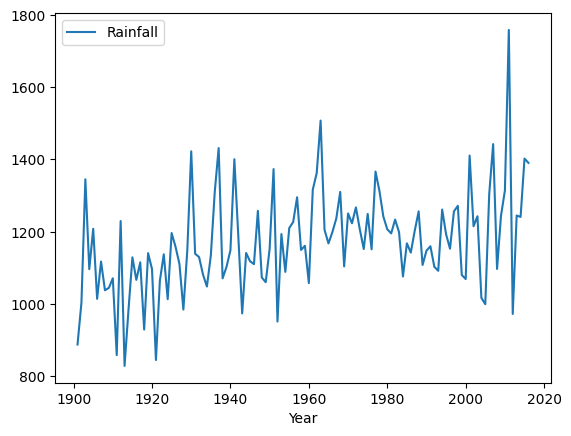

In [496]:
# Let see how the rain fall was for a specific country lets take Rwanda for instance 
rainfall_df.loc[rainfall_df['Country'] == 'Rwanda'].groupby('Year').mean().plot()
plt.show()

<ipython-input-497-34bb5e03d4bd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = rainfall_df.groupby('Year').mean()


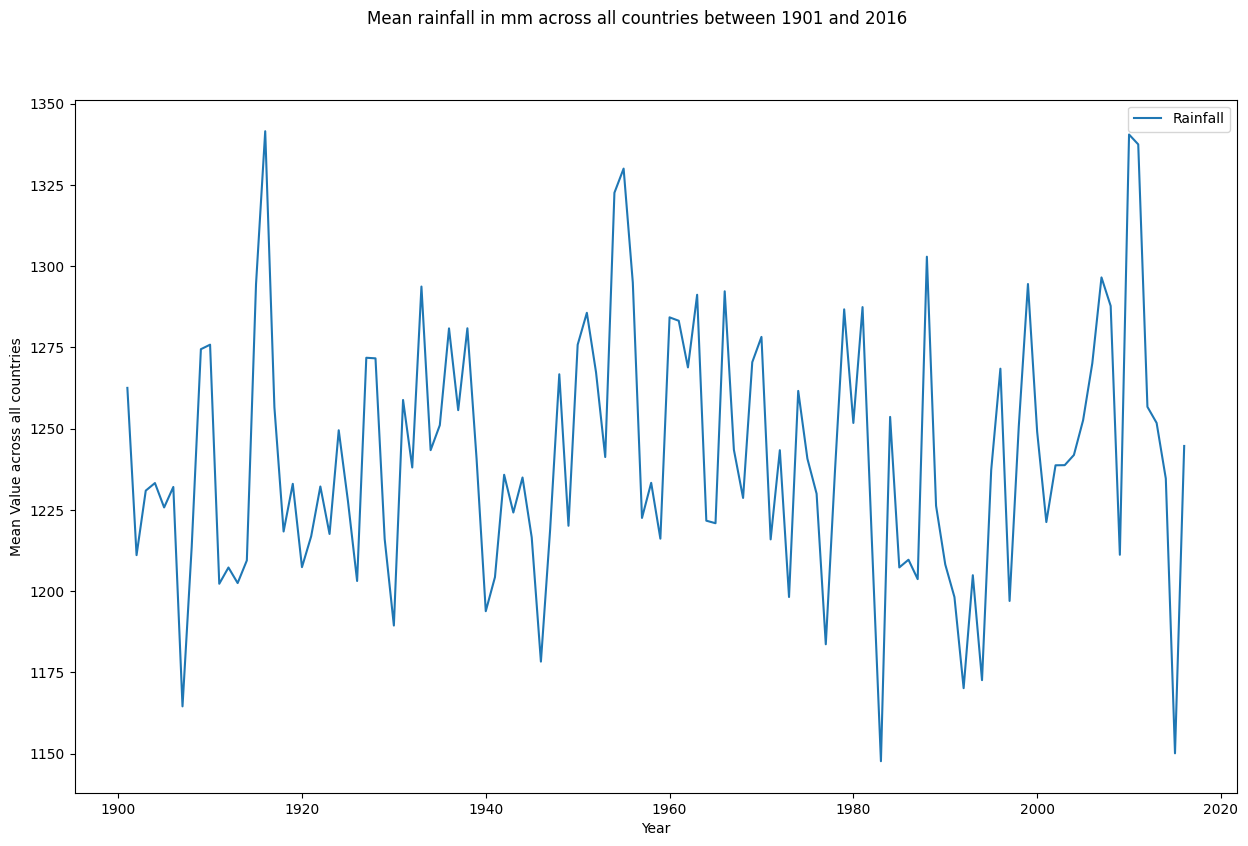

In [497]:
# prepare data
temp_data = rainfall_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## **Next lets explore the Temeperature Dataset**

<ipython-input-498-d9da4ff46875>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df.loc[temperature_df['Country'] == 'Rwanda'].groupby('Year').mean().plot()


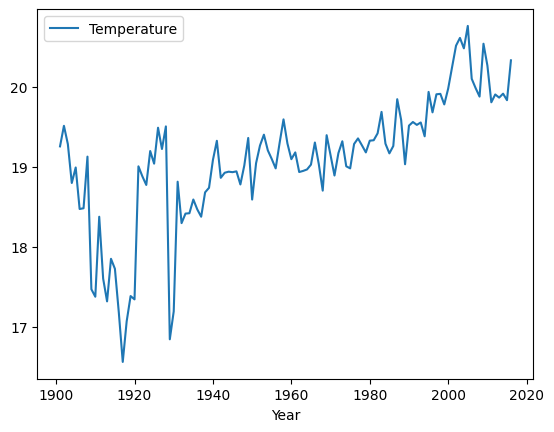

In [498]:
# Let see how the Temperature was for a specific country lets take Rwanda for instance 
temperature_df.loc[temperature_df['Country'] == 'Rwanda'].groupby('Year').mean().plot()
plt.show()

<ipython-input-499-5bdd2a869449>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = temperature_df.groupby('Year').mean()


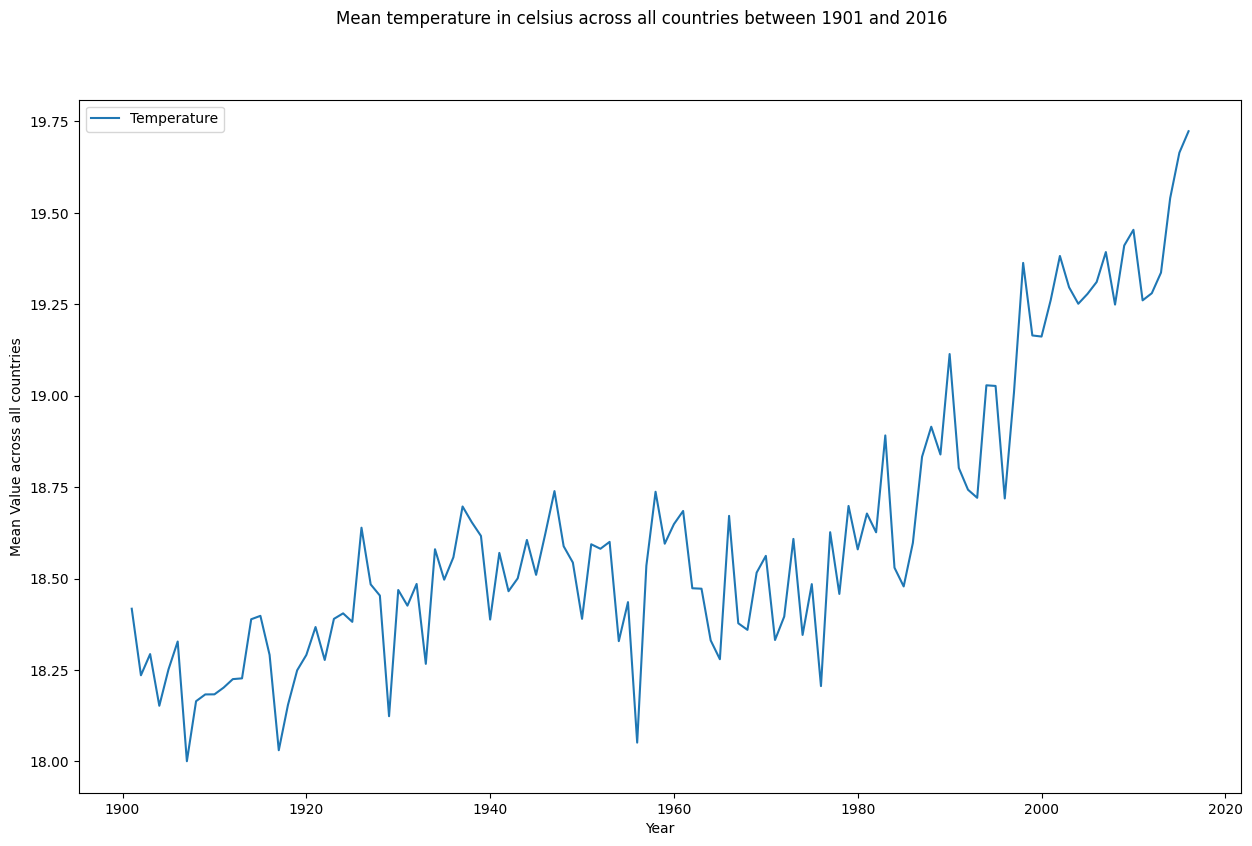

In [499]:
# prepare data
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## **Next, Let's Explore the Yield Dataset**

<ipython-input-500-a7257ea0f32d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yield_mean = yields.groupby(['Year', 'Item']).mean()


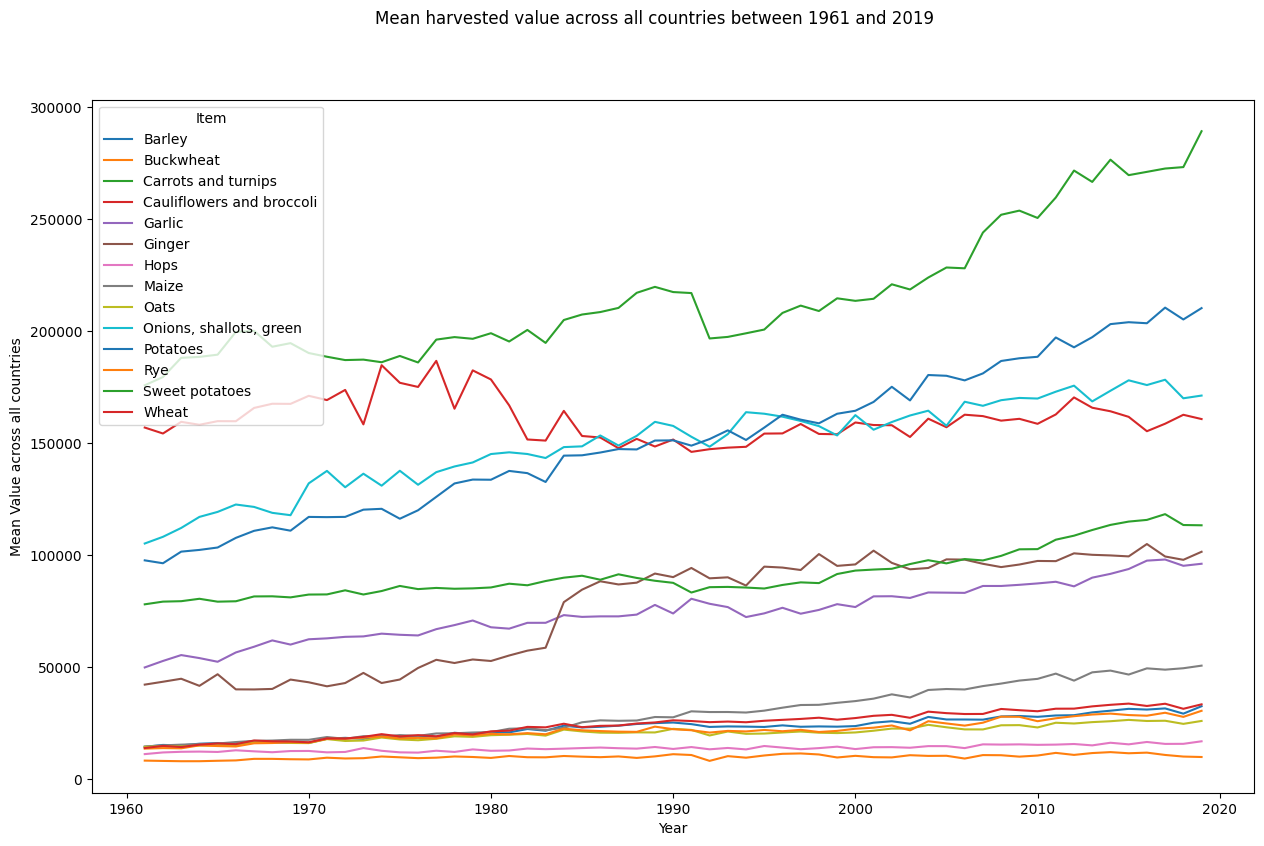

In [500]:
# prepare data
yield_mean = yields.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

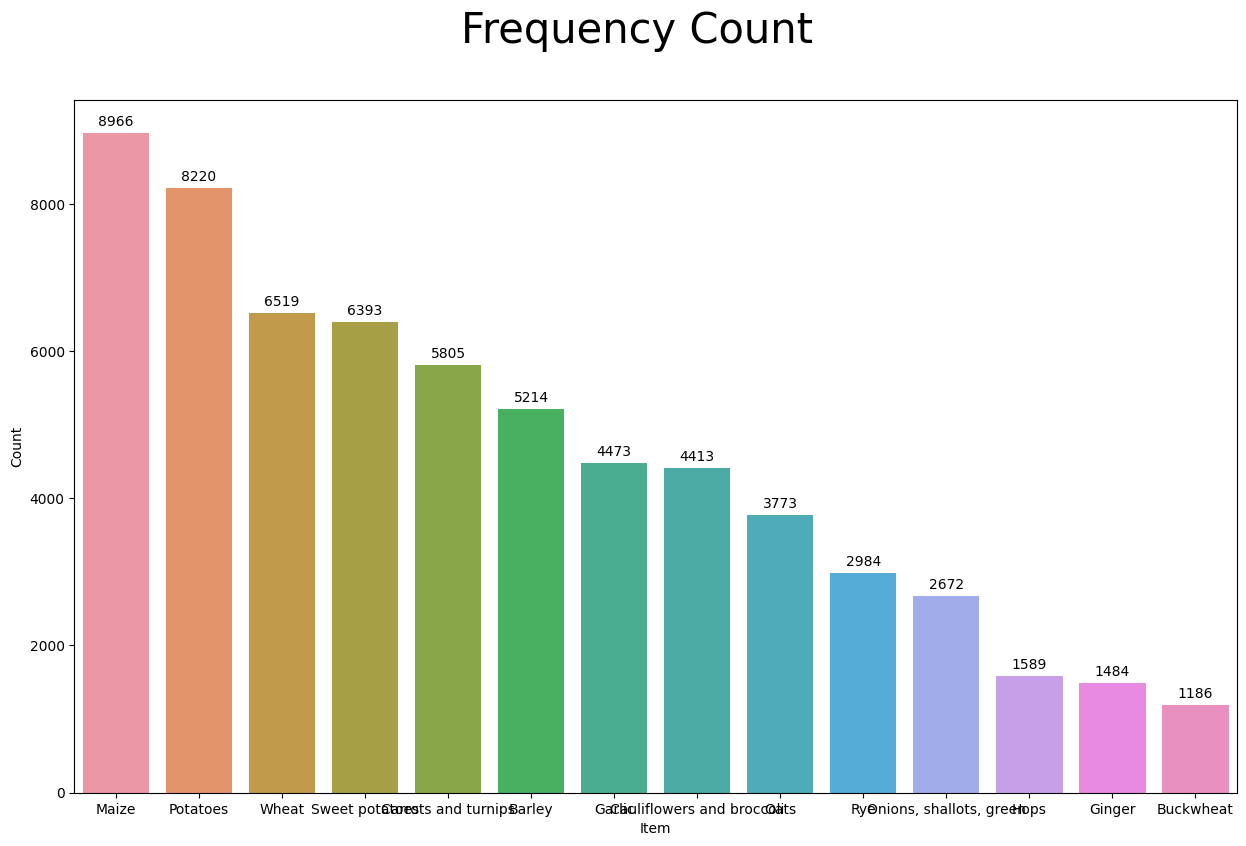

In [501]:
# Lets use a diffrent representation 
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = yields['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()


## **Next, Let's Explore the Pesticide Dataset**

<ipython-input-502-04b614f33caf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pesticides_df.loc[temperature_df['Country'] == 'Rwanda'].groupby('Year').mean().plot()


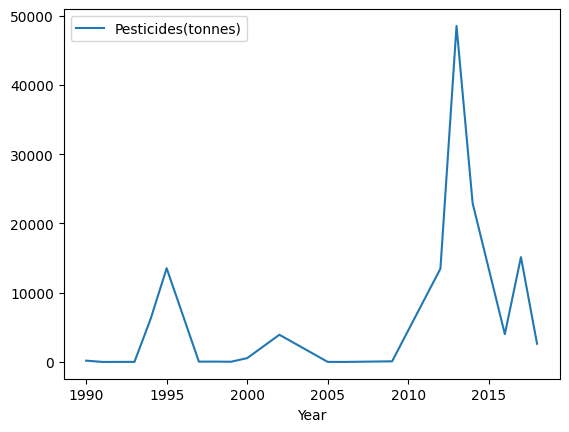

In [502]:
# Let see how the pesticides was for a specific country lets take Rwanda for instance 
pesticides_df.loc[temperature_df['Country'] == 'Rwanda'].groupby('Year').mean().plot()
plt.show()

<ipython-input-503-6b7b6c3c6cae>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = pesticides_df.groupby('Year').mean()


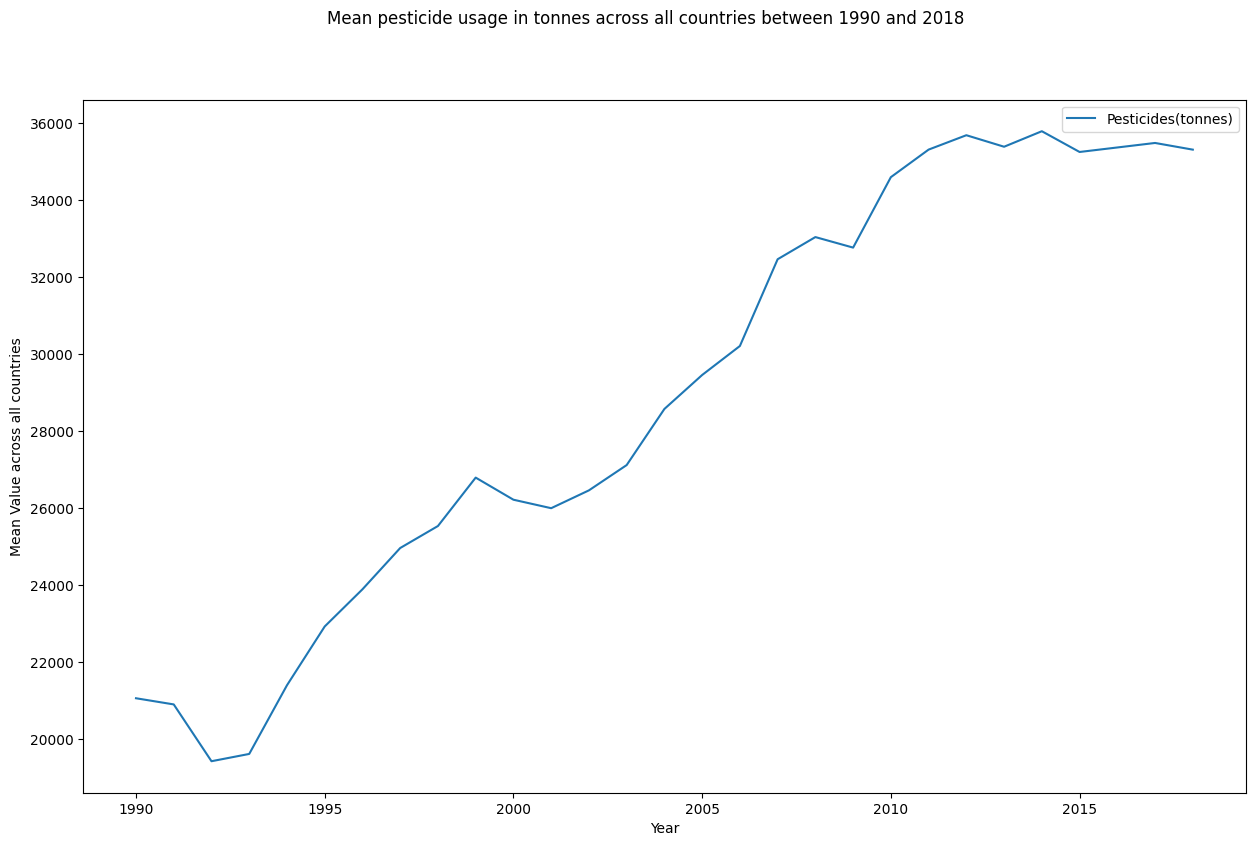

In [503]:
# prepare data
temp_data = pesticides_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide usage in tonnes across all countries between 1990 and 2018')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()
     

# **Exploration on the Merged Dataset (East African Dataset)**

## --> Now that we have seen how each dataset was like, the next step is going to be to explore our new East African dataset that we have created and see explore how that data looks like

<ipython-input-504-0b34608b115b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = east_africa_df.groupby(['Year', 'Item']).mean()


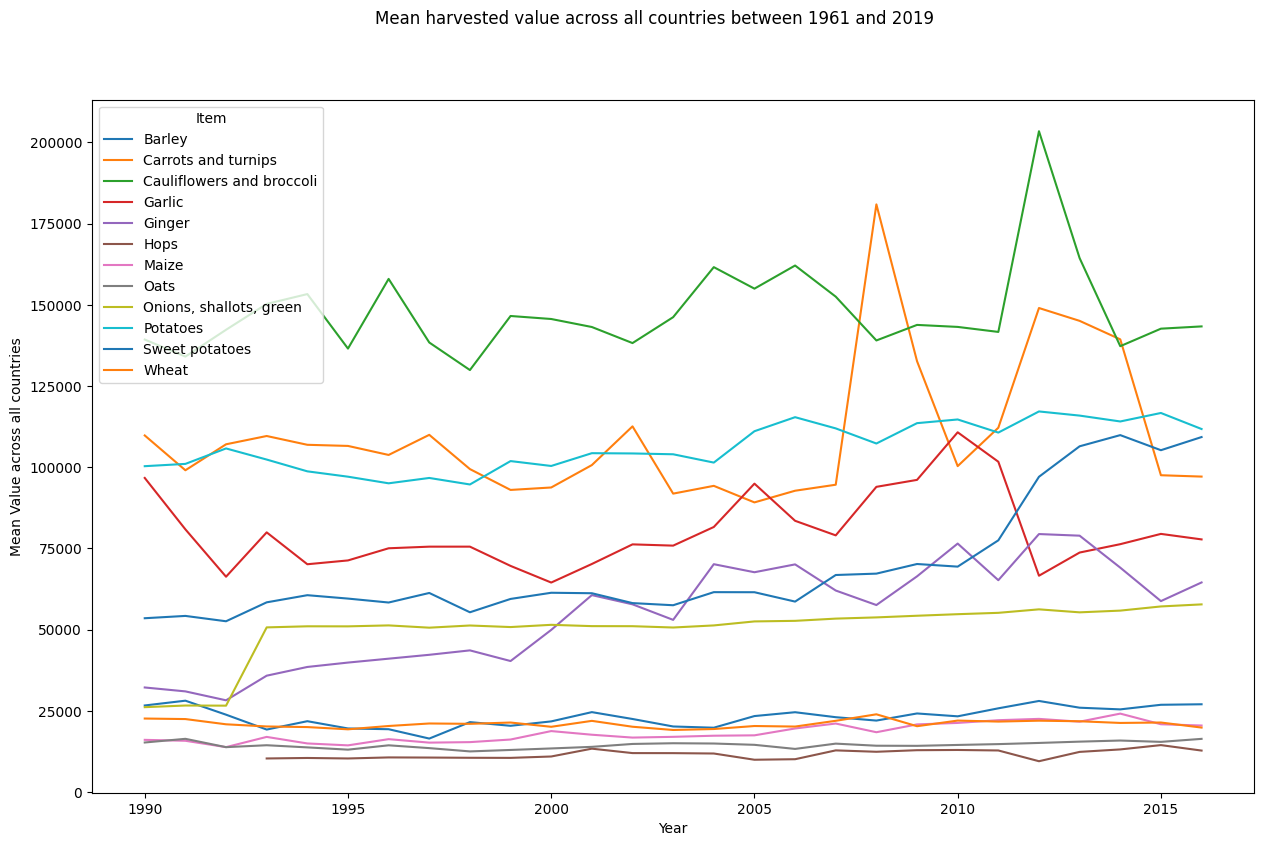

In [504]:
# prepare data
temp_data = east_africa_df.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

temp_data['Yield(hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()
     

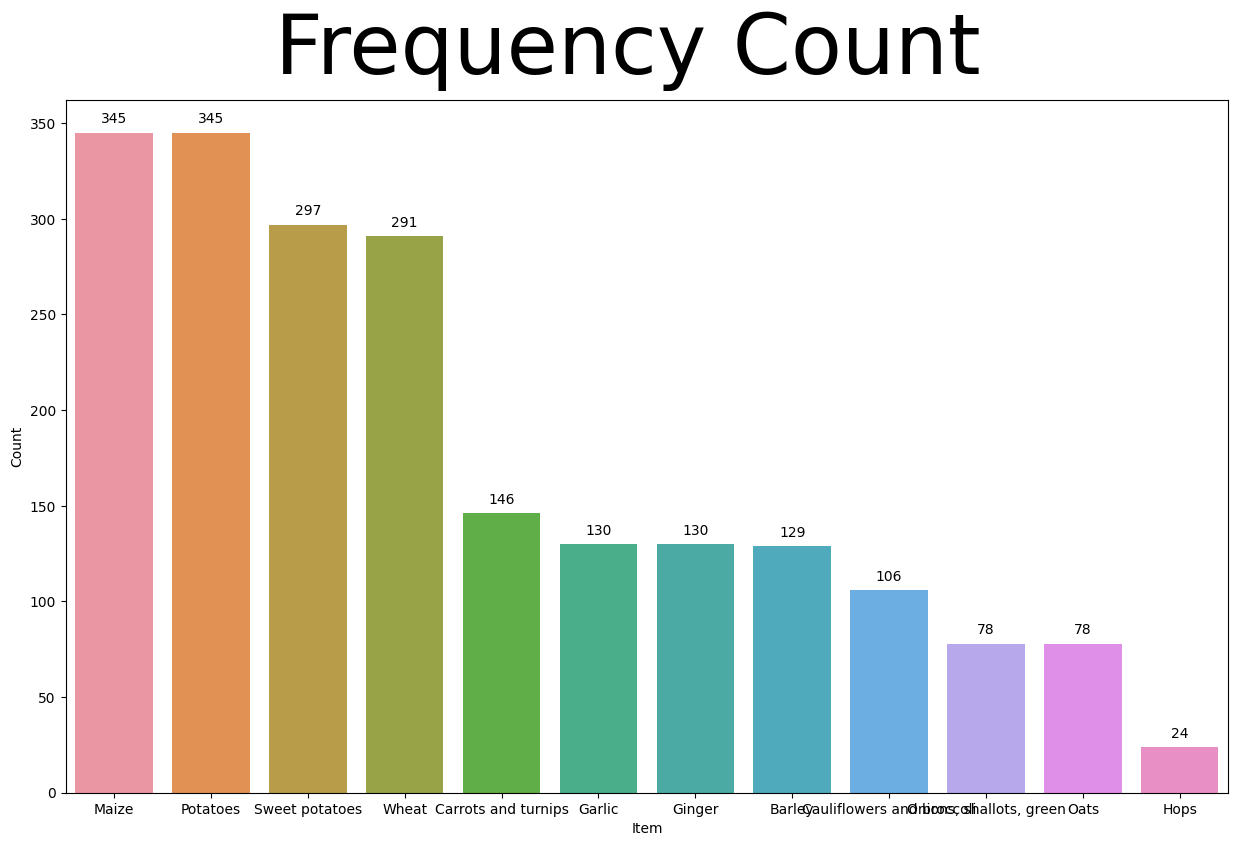

In [505]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=60)

temp_df = east_africa_df['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 5 , row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

## **Now that we have a visual insight of our dataset, lets see how each features are correlated with one another.**

<ipython-input-506-e99389420419>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


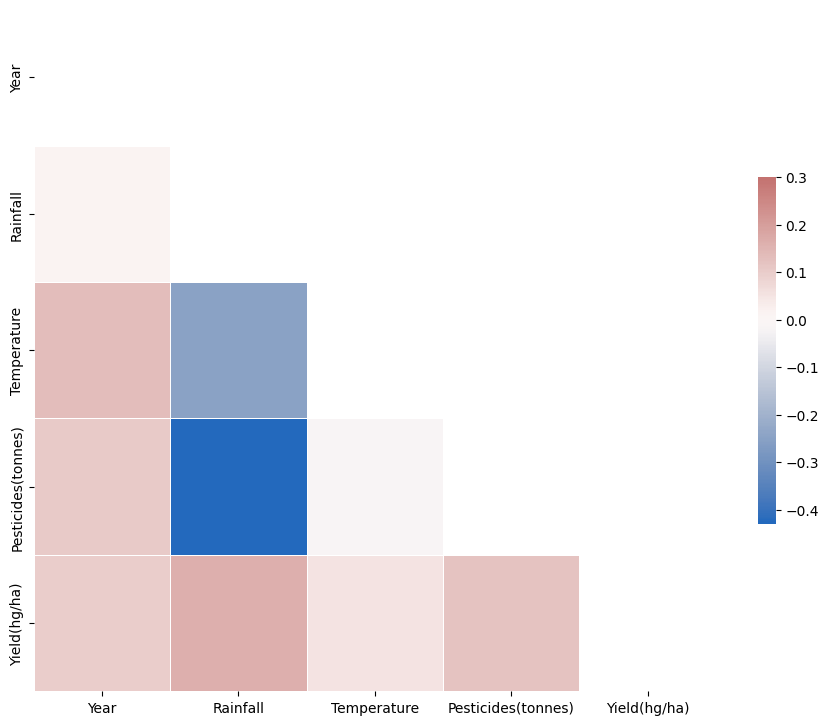

In [506]:
corr = east_africa_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
     

# **Step-Three: Data PreProccessing**
--> Data pre-processing refers to the various techniques and methods used to prepare and clean raw data before it can be used to train a model. This process involves tasks such as removing irrelevant or duplicate data, handling missing values, transforming data into a suitable format, scaling data, and more. 

 Here we are going to do a couple of things to pre proccess the data.

### ->> The first thing we are going to do is One Hot Encoding, which is converting categorical data into numerical data. 

In [507]:
east_africa_df.shape

(2099, 7)

In [508]:
east_africa_df

,Year,Country,Item,Rainfall,Temperature,Pesticides(tonnes),Yield(hg/ha)
105,1990,Burundi,Maize,1244.30807,20.500700,92,13540
106,1990,Burundi,Potatoes,1244.30807,20.500700,92,34836
107,1990,Burundi,Sweet potatoes,1244.30807,20.500700,92,64427
108,1990,Burundi,Wheat,1244.30807,20.500700,92,7478
160,1990,Comoros,Maize,1789.51660,25.438092,1,23800
...,...,...,...,...,...,...,...
25224,2016,Zimbabwe,Maize,455.13295,22.310167,2185,4405
25225,2016,Zimbabwe,Oats,455.13295,22.310167,2185,20505
25226,2016,Zimbabwe,Potatoes,455.13295,22.310167,2185,51792
25227,2016,Zimbabwe,Sweet potatoes,455.13295,22.310167,2185,27283


In [509]:
# Here the year is irrelevant so we will drop the year
east_africa_df = east_africa_df.drop(['Year'] , axis=1)

In [510]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(east_africa_df, columns=['Country', 'Item'], prefix=['Country', 'Item'])
east_africa_df = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
east_africa_df['Yield(hg/ha)'] = df_onehot['Yield(hg/ha)']

In [511]:
east_africa_df.shape

(2099, 29)

In [512]:
east_africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 105 to 25228
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rainfall                        2099 non-null   float64
 1   Temperature                     2099 non-null   float64
 2   Pesticides(tonnes)              2099 non-null   int64  
 3   Yield(hg/ha)                    2099 non-null   int64  
 4   Country_Burundi                 2099 non-null   uint8  
 5   Country_Comoros                 2099 non-null   uint8  
 6   Country_Eritrea                 2099 non-null   uint8  
 7   Country_Ethiopia                2099 non-null   uint8  
 8   Country_Kenya                   2099 non-null   uint8  
 9   Country_Madagascar              2099 non-null   uint8  
 10  Country_Malawi                  2099 non-null   uint8  
 11  Country_Mauritius               2099 non-null   uint8  
 12  Country_Mozambique             

# **Backward Elimination Method**
### --> The next step is Backward Elimination, which simply is a feature selection technique used in machine learning to identify the most relevant features for a model.  

So here we are going to remove features from the dataset that have a p-value greater than 0.05. 

  ***Note: The p-value is a measure of the statistical significance of the coefficient estimates in the regression model. A p-value less than the significance level (in this case, 0.05) indicates that the coefficient estimate is statistically significant, meaning that the corresponding feature has a significant effect on the dependent variable. On the other hand, a p-value greater than the significance level suggests that the coefficient estimate is not statistically significant, and the corresponding feature may not have a significant effect on the dependent variable.***

##  **So, if the maximum p-value (pmax) is greater than 0.05, it means that at least one of the features in the model is not statistically significant.**

In [513]:
import statsmodels.api as sm

y = east_africa_df['Yield(hg/ha)']
X = east_africa_df.drop('Yield(hg/ha)', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

east_africa_df = east_africa_df[cols]
east_africa_df.insert(len(east_africa_df.columns), 'Yield(hg/ha)', y)

In [514]:
east_africa_df.shape

(2099, 19)

In [515]:
east_africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 105 to 25228
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rainfall                        2099 non-null   float64
 1   Temperature                     2099 non-null   float64
 2   Country_Burundi                 2099 non-null   uint8  
 3   Country_Comoros                 2099 non-null   uint8  
 4   Country_Eritrea                 2099 non-null   uint8  
 5   Country_Madagascar              2099 non-null   uint8  
 6   Country_Mauritius               2099 non-null   uint8  
 7   Country_Mozambique              2099 non-null   uint8  
 8   Country_Uganda                  2099 non-null   uint8  
 9   Item_Barley                     2099 non-null   uint8  
 10  Item_Carrots and turnips        2099 non-null   uint8  
 11  Item_Cauliflowers and broccoli  2099 non-null   uint8  
 12  Item_Ginger                    

### Next we will remove all the outliners, which basically refers to the process of identifying and eliminating data points that are significantly different from the rest of the data.

In [516]:

from scipy import stats

y = east_africa_df['Yield(hg/ha)']
X = east_africa_df.drop('Yield(hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield(hg/ha)', y)
east_africa_df = X
     

In [517]:
east_africa_df.shape

(2099, 19)

### The final touch will be feature scalling which is a technique used in machine learning to normalize the range of numerical features in a dataset

In [518]:
from sklearn.preprocessing import MinMaxScaler

y = east_africa_df['Yield(hg/ha)']
X = east_africa_df.drop('Yield(hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield(hg/ha)', y)

east_africa_df = data_without_yield

In [519]:
east_africa_df = east_africa_df.drop(['Item_Carrots and turnips','Item_Cauliflowers and broccoli'], axis=1)

In [520]:
east_africa_df.shape

(2099, 17)

In [521]:
east_africa_df

,Rainfall,Temperature,Country_Burundi,Country_Comoros,Country_Eritrea,Country_Madagascar,Country_Mauritius,Country_Mozambique,Country_Uganda,Item_Barley,Item_Ginger,Item_Hops,Item_Maize,Item_Oats,Item_Potatoes,Item_Wheat,Yield(hg/ha)
105,0.470026,0.134517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13540
106,0.470026,0.134517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34836
107,0.470026,0.134517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64427
108,0.470026,0.134517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7478
160,0.710906,0.728605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25224,0.121359,0.352240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4405
25225,0.121359,0.352240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20505
25226,0.121359,0.352240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51792
25227,0.121359,0.352240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27283


In [522]:
east_africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 105 to 25228
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rainfall            2099 non-null   float64
 1   Temperature         2099 non-null   float64
 2   Country_Burundi     2099 non-null   float64
 3   Country_Comoros     2099 non-null   float64
 4   Country_Eritrea     2099 non-null   float64
 5   Country_Madagascar  2099 non-null   float64
 6   Country_Mauritius   2099 non-null   float64
 7   Country_Mozambique  2099 non-null   float64
 8   Country_Uganda      2099 non-null   float64
 9   Item_Barley         2099 non-null   float64
 10  Item_Ginger         2099 non-null   float64
 11  Item_Hops           2099 non-null   float64
 12  Item_Maize          2099 non-null   float64
 13  Item_Oats           2099 non-null   float64
 14  Item_Potatoes       2099 non-null   float64
 15  Item_Wheat          2099 non-null   float64
 16  Yie

# **Step-Four: Training Our Model**

->> Basically now the next step here is, to start to train our model. We will be using various methods of training our model such as linear regression, Gradient boosting gradient, Random forest regression and others as well.

In [523]:
y = east_africa_df['Yield(hg/ha)']
X = east_africa_df.drop('Yield(hg/ha)', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Here we will use Mean absolute percentage error (MAPE).  It measures the percentage difference between the predicted and actual values of a variable, on average.**

***->> A lower MAPE indicates that the model has a higher level of accuracy in its predictions.***

In [524]:
#Mean absolute percentage error (MAPE) 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [525]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  # Displaying the values in the Box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))
     

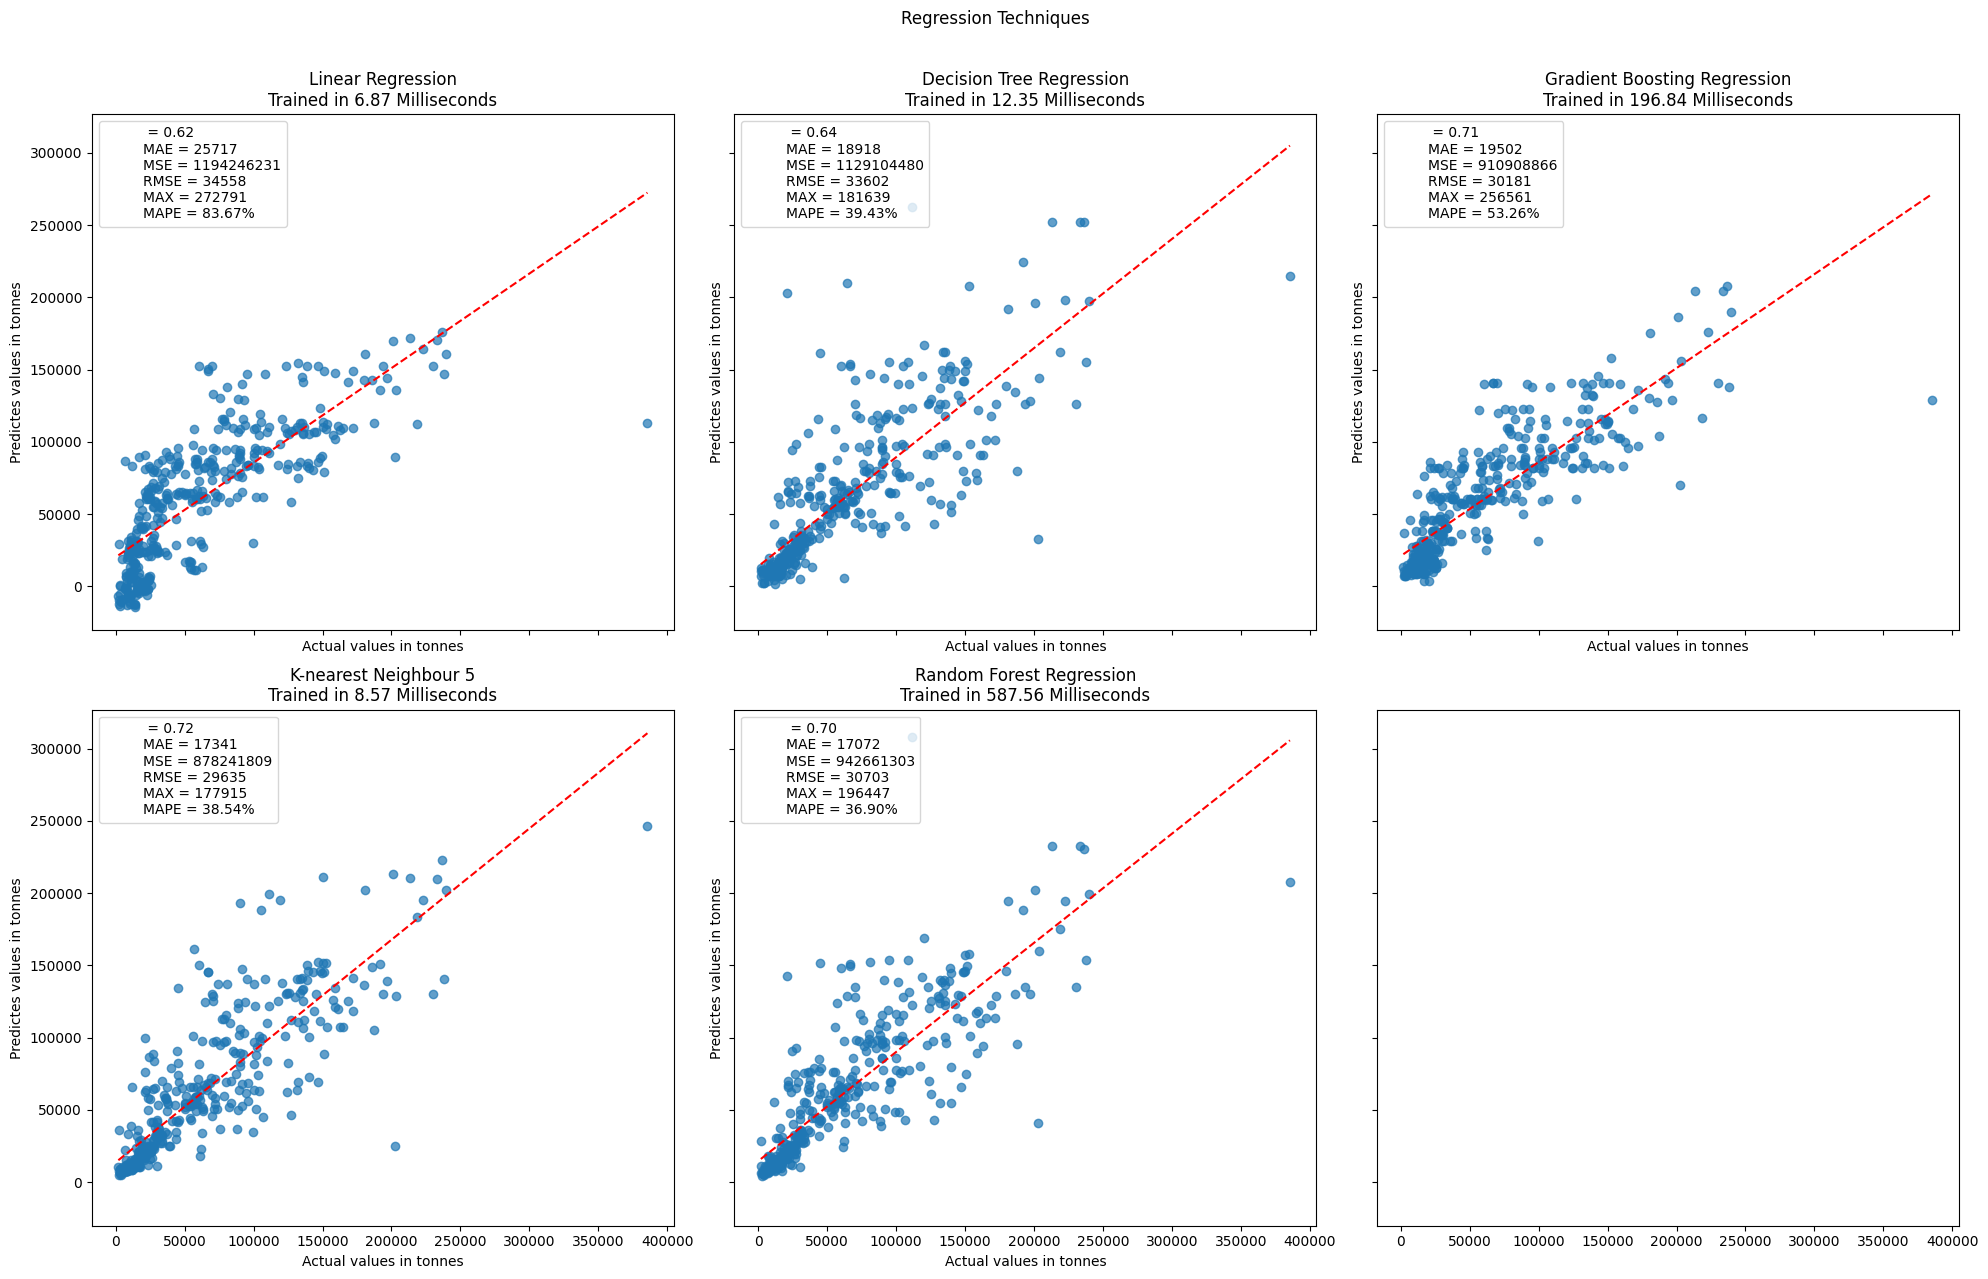

In [526]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Used/Applied Regression
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Defining the sub plots 
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Training the model
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # Model Visualization
  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r' = {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))
  
plt.suptitle('Regression Techniques')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## **>> Here as you ca see from the graph the best model to use based on the r2 values and the MAPE, it is the Random Forest Regression with the *r2 score of 0.72 and MAPE of 36.26%*,  which is the highest than the other models.**

In [527]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Split the data into training and testing sets
y = east_africa_df['Yield(hg/ha)']
X = east_africa_df.drop('Yield(hg/ha)', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model on training set
rf.fit(X_train, y_train)

# Predict on testing set
y_pred = rf.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse, 'MAE: ', mae,'R2: ', r2)


MSE: 902415088.1308079 MAE:  16915.855455906134 R2:  0.7131754685422174


# **4.1 Optimization of our Model**

In [528]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [462]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Define the search space for the hyperparameters
search_space = [
    Integer(50, 500, name='n_estimators'),
    Integer(2, 10, name='max_depth'),
    Integer(2, 20, name='min_samples_split'),
    Integer(1, 10, name='min_samples_leaf')
]

# Define the objective function to minimize
@use_named_args(search_space)
def objective(**params):
    rf = RandomForestRegressor(**params)
    model = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    return mae

# Perform the Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=50,
    random_state=42
)
# Save the model to a file
with open("crop.pkl", "wb") as f:
    pickle.dump(model, f)
pickle_in = open("crop.pkl","rb")
final_model=pickle.load(pickle_in)

# Print the best hyperparameters found
print('Best hyperparameters:', result.x)
print('Best MAE:', result.fun)


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packa

Best hyperparameters: [500, 10, 2, 1]
Best MAE: 15222.261606298136


In [463]:
east_africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 105 to 25228
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rainfall            2099 non-null   float64
 1   Temperature         2099 non-null   float64
 2   Country_Burundi     2099 non-null   float64
 3   Country_Comoros     2099 non-null   float64
 4   Country_Eritrea     2099 non-null   float64
 5   Country_Madagascar  2099 non-null   float64
 6   Country_Mauritius   2099 non-null   float64
 7   Country_Mozambique  2099 non-null   float64
 8   Country_Uganda      2099 non-null   float64
 9   Item_Barley         2099 non-null   float64
 10  Item_Ginger         2099 non-null   float64
 11  Item_Hops           2099 non-null   float64
 12  Item_Maize          2099 non-null   float64
 13  Item_Oats           2099 non-null   float64
 14  Item_Potatoes       2099 non-null   float64
 15  Item_Wheat          2099 non-null   float64
 16  Yie

In [464]:
east_africa_df

,Rainfall,Temperature,Country_Burundi,Country_Comoros,Country_Eritrea,Country_Madagascar,Country_Mauritius,Country_Mozambique,Country_Uganda,Item_Barley,Item_Ginger,Item_Hops,Item_Maize,Item_Oats,Item_Potatoes,Item_Wheat,Yield(hg/ha)
105,0.470026,0.134517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13540
106,0.470026,0.134517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34836
107,0.470026,0.134517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64427
108,0.470026,0.134517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7478
160,0.710906,0.728605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25224,0.121359,0.352240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4405
25225,0.121359,0.352240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20505
25226,0.121359,0.352240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51792
25227,0.121359,0.352240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27283
